## Upload Data:
Since we use LabeledText.xlsx as Dataset we run this code to allow user upload it from his computer

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')

# Load the uploaded Excel file into a pandas DataFrame
df = pd.read_excel(list(uploaded.keys())[0])

# Display the DataFrame
print(df.head())

Saving LabeledText.xlsx to LabeledText.xlsx
User uploaded file "LabeledText.xlsx" with length 383974 bytes
  File Name                                            Caption     LABEL
0     1.txt      How I feel today #legday #jelly #aching #gym   negative
1    10.txt  @ArrivaTW absolute disgrace two carriages from...  negative
2   100.txt  This is my Valentine's from 1 of my nephews. I...  positive
3  1000.txt  betterfeelingfilms: RT via Instagram: First da...   neutral
4  1001.txt         Zoe's first love #Rattled @JohnnyHarper15   positive


## Load and Inspect the Data

In [ ]:
# import pandas as pd
# import numpy as np
# import zipfile

# df = pd.read_excel('LabeledText.xlsx')


In [ ]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
#keep only the columns we need
df=df[['Caption','LABEL']]

In [ ]:
# Print unique categories/labels in the dataset
print('Categories')
print(df.LABEL.unique())
print("-------------")

# Print a sample of the dataset
print('Dataset Sample')
df.head()


Categories
['negative' 'positive' 'neutral']
-------------
Dataset Sample


,Caption,LABEL
0,How I feel today #legday #jelly #aching #gym,negative
1,@ArrivaTW absolute disgrace two carriages from Bangor half way there standing room only #disgraced,negative
2,This is my Valentine's from 1 of my nephews. I am elated; sometimes the little things are the biggest & best things!,positive
3,betterfeelingfilms: RT via Instagram: First day of filming #powerless back in 2011. Can't ¡­,neutral
4,Zoe's first love #Rattled @JohnnyHarper15,positive


## Lowercase the Data

In [ ]:
# Lowercase the data
df['text_cleaned'] = df['Caption'].apply(lambda x: x.lower())

In [ ]:
!pip install lxml

## Remove URLs and HTML Tags

In [ ]:
import re
from bs4 import BeautifulSoup

# Removing URLs from the text
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Removing HTML tags from the text
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "html.parser").text)

<ipython-input-7-f75bca03d16c>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "html.parser").text)


## Convert Chat Words to Full Forms

In [ ]:
# Dictionary to convert common chat words to their full forms
#There are many more chat words that can be added to this dictionary. These are some common examples.
chat_words_dict = {
    "imo": "in my opinion",
     "cyaa": "see you",
    "idk": "I don't know",
    "rn": "right now",
    "afaik": "as far as I know",

}



In [ ]:
# Function that returns the text with chat words converted to their full forms

def convert_chat_words(text):
    words = text.split()
    converted_words = []
    for word in words:
        if word.lower() in chat_words_dict:
            converted_words.append(chat_words_dict[word.lower()])
        else:
            converted_words.append(word)
    converted_text = " ".join(converted_words)
    return converted_text

In [ ]:
df['text_cleaned'] = df['text_cleaned'].apply(convert_chat_words)

## Remove Punctuation, Numbers, Extra Spaces, and Special Characters

In [ ]:
# Removing punctuation
import string
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Removing numbers
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'\d+', '', x))

# Removing extra spaces
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join(x.split()))

# Replacing repetitions of punctuation
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'(\W)\1+', r'\1', x))

In [ ]:
# Removing special characters
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r"[^\w\s]", '', x))

## Install and Use Contractions Library

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.2 MB/s eta 0:00:00


In [ ]:
# Removing contractions
import contractions
# Remove contractions from the 'text_cleaned' column
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: contractions.fix(x))

## Tokenization and Removing Stop Words

In [ ]:
!pip install nltk

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
# Tokenization
df['tokens'] = df['text_cleaned'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Removing stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
# Loading English stop words
stop_words = set(stopwords.words('english'))

# Removing stop words from the 'tokens' column
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Print the updated 'tokens' column
df['tokens'].tail(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


4849              [get, friday, night, look, sorted, newin, lbd, littleblackdress, strappy, plunge, neckline, mini, black, bodycon]
4850                                                                                         [rt, nneagoe, love, caring, beautiful]
4851               [february, winter, rainy, stormy, windy, wednesday, morning, love, happy, positive, passionate, reading, coffee]
4852    [rt, thatguykai, honored, pittsburgh, pirates, consultant, coachotip, speak, ball, club, passionate, relentless, ownership]
4853                                              [genghis, khan, ily, relatable, king, passionate, yeet, yas, sogengrn, apgenghis]
4854                 [february, winter, rainy, stormy, windy, wednesday, evening, love, happy, positive, passionate, calm, fun, uk]
4855                  [february, winter, rainy, stormy, windy, wednesday, evening, love, happy, positive, passionate, calm, coffee]
4856                                                   [rt, bishopcarrollhs,

## Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')
# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# POS tag mapping dictionary
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

# Function to perform Lemmatization on a text
def lemmatize_text(text):
    # Get the POS tags for the words
    pos_tags = nltk.pos_tag(text)

    # Perform Lemmatization
    lemmatized_words = []
    for word, tag in pos_tags:
        # Map the POS tag to WordNet POS tag
        pos = wordnet_map.get(tag[0].upper(), wordnet.NOUN)
        # Lemmatize the word with the appropriate POS tag
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)
        # Add the lemmatized word to the list
        lemmatized_words.append(lemmatized_word)

    return lemmatized_words

# Apply Lemmatization to the 'tokens' column
df['tokens'] = df['tokens'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df.head()

,Caption,LABEL,text_cleaned,tokens
0,How I feel today #legday #jelly #aching #gym,negative,how i feel today legday jelly aching gym,"[feel, today, legday, jelly, ache, gym]"
1,@ArrivaTW absolute disgrace two carriages from Bangor half way there standing room only #disgraced,negative,arrivatw absolute disgrace two carriages from bangor half way there standing room only disgraced,"[arrivatw, absolute, disgrace, two, carriage, bangor, half, way, stand, room, disgrace]"
2,This is my Valentine's from 1 of my nephews. I am elated; sometimes the little things are the biggest & best things!,positive,this is my valentines from of my nephews i am elated sometimes the little things are the biggest best things,"[valentine, nephew, elate, sometimes, little, thing, big, best, thing]"
3,betterfeelingfilms: RT via Instagram: First day of filming #powerless back in 2011. Can't ¡­,neutral,betterfeelingfilms rt via instagram first day of filming powerless back in cannot,"[betterfeelingfilms, rt, via, instagram, first, day, film, powerless, back]"
4,Zoe's first love #Rattled @JohnnyHarper15,positive,zoes first love rattled johnnyharper,"[zoes, first, love, rattle, johnnyharper]"


## Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# First split: 70% train, 30% temporary
X_train, X_temp, y_train, y_temp = train_test_split(df.tokens, df.LABEL, test_size=0.3, random_state=12547392)

# Second split: 50% validation, 50% test of the remaining 30%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12547392)


In [ ]:
print(X_train.head())
print(y_train.head())

1807             [rt, dallasblackcom, horrible, news, los, angeles, today, regard, khloes, estrange, husband, lamar, odom]
1619                                                                                          [feel, desolate, take, quiz]
526     [rt, bosshogswife, duckcommanderkidsdevo, release, today, book, much, fun, read, kiddos, chryssymama, excite, htt]
915                                                                          [indias, modi, appal, temple, build, worship]
3485                                                      [photo, photographer, get, rumble, jungle, beat, stone, gorilla]
Name: tokens, dtype: object
1807    negative
1619    negative
526     positive
915     negative
3485     neutral
Name: LABEL, dtype: object


In [ ]:
# Printing the lengths of the training and validation sets

print(len(X_train)) # Number of samples in the training set
print(len(y_train))  # Number of labels in the training set
print(len(X_val))  # Number of samples in the validation set
print(len(y_val))  # Number of labels in the validation set
print(len(X_test))  # Number of samples in the validation set
print(len(y_test))  # Number of labels in the validation set

3408
3408
730
730
731
731


## Sequence Length Statistics

In [ ]:
import numpy as np
# Get mean and std of sequence length on trainning set
print(np.mean([len(x) for x in X_train]))
print(np.std([len(x) for x in X_train]))

8.541960093896714
3.610837223388305


## One-Hot Encoding Labels

In [ ]:
y_train_1_hot = pd.get_dummies(y_train).values.tolist()


#1-Hot to train set
for i in range(len(y_train_1_hot)):
    for j in range(3):
        if y_train_1_hot[i][j]==True:
            y_train_1_hot[i][j]=1
        else:
            y_train_1_hot[i][j]=0



#1-Hot to validation set
y_val_1_hot = pd.get_dummies(y_val).values.tolist()

for i in range(len(y_val_1_hot)):
    for j in range(3):
        if y_val_1_hot[i][j]==True:
            y_val_1_hot[i][j]=1
        else:
            y_val_1_hot[i][j]=0


#1-Hot to validation set
y_test_1_hot = pd.get_dummies(y_test).values.tolist()

for i in range(len(y_test_1_hot)):
    for j in range(3):
        if y_test_1_hot[i][j]==True:
            y_test_1_hot[i][j]=1
        else:
            y_test_1_hot[i][j]=0




for i,name in enumerate (pd.get_dummies(y_train).columns):
    print("Index:",i," Category: ",name)

print("-----------------------------------")

print("Label index: {} | 1-hot vector:  {}".format(y_train[0],
                                                   y_train_1_hot[0]))
print("Label index: {} | 1-hot vector:  {}".format(y_train[2],
                                                   y_train_1_hot[2]))
print("Label index: {} | 1-hot vector:  {}".format(y_train.iloc[-3],
                                                   y_train_1_hot[-3]))

Index: 0  Category:  negative
Index: 1  Category:  neutral
Index: 2  Category:  positive
-----------------------------------
Label index: negative | 1-hot vector:  [1, 0, 0]
Label index: positive | 1-hot vector:  [0, 0, 1]
Label index: neutral | 1-hot vector:  [0, 1, 0]


In [ ]:
# Convert y_train_1_hot from list to numpy array
y_train_1_hot = np.array(y_train_1_hot)
y_val_1_hot = np.array(y_val_1_hot)
y_test_1_hot = np.array(y_test_1_hot)

## TF-IDF Feature Extraction

In [ ]:
# Importing TfidfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Use unigram & bi-gram tf*idf features
# max_features=6000: Limiting the maximum number of features to 6000
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features = 6000,
                             sublinear_tf=True)

# Transforming the tokenized text data into TF-IDF features for training set
X_train_tfidf = vectorizer.fit_transform([" ".join(x) for x in
                                          X_train])

# Transforming the tokenized text data into TF-IDF features for validation set
X_val_tfidf = vectorizer.transform([" ".join(x) for x in
                                    X_val])

# Transforming the tokenized text data into TF-IDF features for validation set
X_test_tfidf = vectorizer.transform([" ".join(x) for x in
                                    X_test])

print(X_train_tfidf.shape, type(X_train_tfidf))

(3408, 6000) <class 'scipy.sparse._csr.csr_matrix'>


## Logistic Regression Model

In [ ]:
## Logistic Regression Without SVD

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train_tfidf, y_train)

predictions = clf.predict(X_test_tfidf)
# print(classification_report(y_val, predictions,
#                             target_names=df.LABEL))

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.70      0.64      0.67       221
     neutral       0.61      0.66      0.63       273
    positive       0.74      0.73      0.73       237

    accuracy                           0.67       731
   macro avg       0.68      0.67      0.68       731
weighted avg       0.68      0.67      0.68       731



## Text Vectorization and Embedding Matrix Preparation

In [ ]:
from tensorflow.keras.layers import TextVectorization

MAX_WORDS = 100000
MAX_SEQUENCE_LENGTH = 256
EMBEDDING_DIM = 300

vectorizer = TextVectorization(max_tokens=MAX_WORDS, output_mode='int', ngrams=1,
              output_sequence_length=MAX_SEQUENCE_LENGTH)

vectorizer.adapt([" ".join(x) for x in X_train])

In [ ]:
print(X_train[0])
for widx, word in zip(vectorizer(' '.join(X_train[0])).numpy().tolist(),X_train[0]):
  print((widx,word))


['feel', 'today', 'legday', 'jelly', 'ache', 'gym']
(15, 'feel')
(12, 'today')
(7309, 'legday')
(2618, 'jelly')
(515, 'ache')
(810, 'gym')


In [ ]:
# Print an example with a sentece from the dataset and the represantation in vectorizer
print(df['text_cleaned'][3409])
vectorizer.call(df['text_cleaned'][3409])

genuine hp black ink cartridge in damaged retail box


<tf.Tensor: shape=(256,), dtype=int64, numpy=
array([ 815,  568,   11, 1248, 1352,    1,    1, 1155,  188,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

In [ ]:
import gensim.downloader as api
word2vec = api.load('word2vec-google-news-300')

embedding_matrix = np.zeros((MAX_WORDS, 300))  # +2 (pad, unkown)

# PAD is vector zero
# UNK is also vector zero
for w2idx, _word in enumerate(vectorizer.get_vocabulary()):
    # Skip PAD and UNK tokens
    if w2idx < 2:
      continue
    try:
        embedding_matrix[w2idx] = word2vec[_word]
    except:
        pass

del word2vec

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# example of a word embedding of a random word

print(vectorizer.get_vocabulary()[3])
print(embedding_matrix[3])

get
[ 0.03320312 -0.08984375 -0.29492188  0.11523438 -0.07128906 -0.05395508
  0.01049805  0.11914062  0.02453613  0.08007812 -0.15039062 -0.19042969
  0.04785156  0.17089844 -0.12695312  0.04394531  0.04760742  0.15722656
  0.17089844  0.06201172 -0.10644531  0.10791016  0.2734375   0.01989746
  0.20996094 -0.05737305 -0.03710938 -0.12060547  0.12255859 -0.04589844
 -0.04663086  0.08349609 -0.171875   -0.00500488  0.15234375 -0.12890625
  0.03295898 -0.01409912  0.11669922  0.11669922  0.07763672 -0.13574219
  0.11816406 -0.01647949 -0.16308594 -0.17578125 -0.08544922 -0.05444336
  0.04492188  0.11425781 -0.13183594  0.2265625   0.0612793  -0.04370117
 -0.0133667   0.06542969  0.05004883  0.00445557 -0.06982422 -0.08789062
  0.13769531 -0.04663086 -0.17480469  0.01818848  0.01660156  0.06005859
 -0.00970459  0.00915527 -0.06933594  0.14355469  0.19140625  0.18261719
  0.10595703 -0.08935547 -0.19238281 -0.04663086  0.08837891  0.23730469
  0.02355957  0.15039062 -0.03369141  0.0319824

## Metrics Class for Model Evaluation

In [ ]:
# Create class Metrics

import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os


class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, valid_data):
        super(Metrics, self).__init__()
        self.validation_data = valid_data

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_predict = np.argmax(self.model.predict(self.validation_data[0]), -1)
        val_targ = self.validation_data[1]
        val_targ = tf.cast(val_targ,dtype=tf.float32)
        if len(val_targ.shape) == 2 and val_targ.shape[1] != 1:
          val_targ = np.argmax(val_targ, -1)


        _val_f1 = f1_score(val_targ, val_predict,average="weighted")
        _val_recall = recall_score(val_targ, val_predict,average="weighted")
        _val_precision = precision_score(val_targ, val_predict,average="weighted")

        logs['val_f1'] = _val_f1
        logs['val_recall'] = _val_recall
        logs['val_precision'] = _val_precision
        print(" — val_f1: %f — val_precision: %f — val_recall: %f" % (_val_f1, _val_precision, _val_recall))
        return

## Self-Attention Layer Definition

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Layer

class SelfAttention(Layer):
  def __init__(self, mlp_layers=0, units=0, dropout_rate=0, return_attention=False, **kwargs):
    super(SelfAttention, self).__init__(**kwargs)
    self.mlp_layers = mlp_layers
    self.mlp_units = units
    self.return_attention = return_attention
    self.dropout_rate = dropout_rate
    self.attention_mlp = self.build_mlp()

  def build_mlp(self):
    mlp = Sequential()
    for i in range(self.mlp_layers):
      mlp.add(Dense(self.mlp_units, activation='relu'))
      mlp.add(Dropout(self.dropout_rate))
    mlp.add(Dense(1))
    return mlp

  def call(self, x, mask=None):
    # x  = [batch_size,max_len,H_rnn] ==> [batch_size*max_len,H_rnn]
    # a = [batch_size*max_len,H_rnn] * [H_rnn,1] = [batch_size*max_len,1]
    # a reshaped to 3D given batch_size and max_len values
    # a = [batch_size,max_len,1]
    a = self.attention_mlp(x)
    # squeze last dimension of a to get the final attention matrix [batch_size,max_len]
    a = tf.squeeze(a, axis=2)

    if mask is not None:
      # apply mask to zero out padded elements. Remember that exp ^ (large negative value) =  0
      mask = tf.keras.backend.cast(mask, tf.keras.backend.floatx())
      a -= 100000.0 * (1.0 - mask)

    # Aplply softmax to the max_len dimension
    a = tf.keras.backend.expand_dims(tf.keras.backend.softmax(a, axis=-1))
    # Element-wise multiplication of attention scores a [batch_size,max_len] with the original x matrix [batch_size,max_len,H_rnn]
    weighted_input = x * a  # [batch_size,max_len,H_rnn]
    # Add/sum scaled H_rnn dim over max_len dimension
    result = tf.keras.backend.sum(weighted_input, axis=1) # [batch_size, H_rnn]

    if self.return_attention:
      return [result, a]
    return result


## Build, Prepare Data for Training and Compile the Model

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

LSTM_SIZE = 300
DENSE = 1000

# create empty sequential model
model2 = Sequential()
model2.add(Input(shape=(1,), dtype=tf.string))
model2.add(vectorizer)
# add an embedding layer
model2.add(Embedding(MAX_WORDS, EMBEDDING_DIM, weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, trainable=False))

# Use 0.33 dropout probabillity
model2.add(Dropout(0.33))
# add a bidirectional lstm layer with 0.33 variational (recurrent) dropout
model2.add(Bidirectional(LSTM(LSTM_SIZE, return_sequences=True, recurrent_dropout = 0.33)))
model2.add(Dropout(0.33))
# Add linear self-attention layer
# mlp_layers=0 ==>  # sum(softmax(WX + b) * X)
model2.add(SelfAttention(mlp_layers=0))


# add an MLP with 1 hidden layer
model2.add(Dense(units=DENSE, activation='relu' ))
model2.add(Dropout(0.33))
model2.add(Dense(len(y_train.unique()), activation='softmax'))
print(model2.summary())

model2.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),metrics=["categorical_accuracy"])

train_data = np.array([[" ".join(x_train)] for x_train in X_train])
val_data = np.array([[" ".join(x_val)] for x_val in X_val])
test_data = np.array([[" ".join(x_test)] for x_test in X_test])

# Convert the numpy arrays to tensors
train_data = tf.convert_to_tensor(train_data, dtype=tf.string)
val_data = tf.convert_to_tensor(val_data, dtype=tf.string)
test_data = tf.convert_to_tensor(test_data, dtype=tf.string)

history2 = model2.fit(train_data, y_train_1_hot,
              validation_data=(val_data, y_val_1_hot),
              batch_size=256,
              epochs=10,
              shuffle=True,
              callbacks=[Metrics(valid_data=(val_data, y_val_1_hot))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 256)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 256, 300)          30000000  
                                                                 
 dropout (Dropout)           (None, 256, 300)          0         
                                                                 
 bidirectional (Bidirection  (None, 256, 600)          1442400   
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 256, 600)          0         
                                                                 
 self_attention (SelfAttent  (None, 600)               6

## Plot Training History

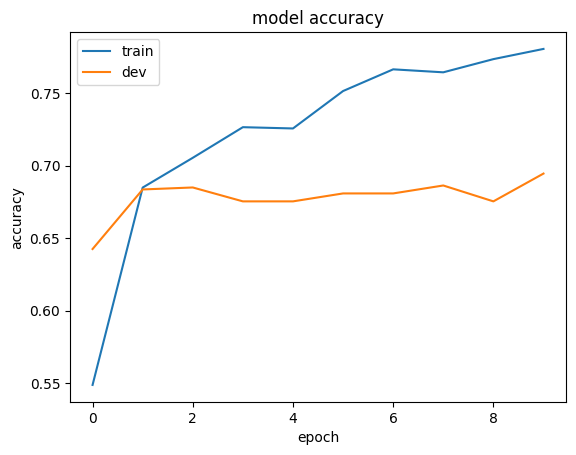

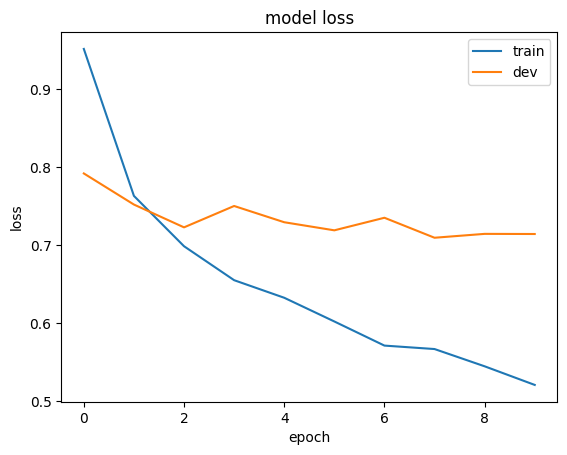

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

## Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report

predictions = np.argmax(model2.predict(test_data), -1)


In [ ]:
# Create a dictionary to map class labels to class names
label_to_name = {i: name for i, name in enumerate(pd.get_dummies(y_test).columns)}

# Replace integer class labels in predictions with class names
predictions_with_names = [label_to_name[label] for label in predictions]

print(predictions_with_names)


In [ ]:
print(classification_report(y_test, predictions_with_names))

              precision    recall  f1-score   support

    negative       0.75      0.66      0.70       221
     neutral       0.66      0.71      0.69       273
    positive       0.79      0.81      0.80       237

    accuracy                           0.73       731
   macro avg       0.73      0.73      0.73       731
weighted avg       0.73      0.73      0.73       731

              precision    recall  f1-score   support

    negative       0.75      0.66      0.70       221
     neutral       0.66      0.71      0.69       273
    positive       0.79      0.81      0.80       237

    accuracy                           0.73       731
   macro avg       0.73      0.73      0.73       731
weighted avg       0.73      0.73      0.73       731



## Hyperparameter Tuning

We will use Keras Tuner to find the optimal hyperparameters for our model. The following code sets up the tuner and performs the search.

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
# Import necessary packages
import keras_tuner as kt
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam

# Define a function to build the model
def build_model(hp):
    LSTM_SIZE = hp.Choice('lstm_size', values=[50, 200])
    DENSE_UNITS = hp.Choice('dense_units', values=[50])
    DROPOUT_RATE = hp.Choice('dropout_rate', values=[0.2, 0.5])
    MLP_LAYERS = hp.Int('mlp_layers', min_value=0, max_value=2, step=1)
    MLP_UNITS = hp.Choice('mlp_units', values=[50])

    model = Sequential()
    model.add(Input(shape=(1,), dtype=tf.string))
    model.add(vectorizer)
    model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, weights=[embedding_matrix],
                        input_length=MAX_SEQUENCE_LENGTH, mask_zero=True, trainable=False))
    model.add(Dropout(DROPOUT_RATE))
    model.add(Bidirectional(LSTM(LSTM_SIZE, return_sequences=True, recurrent_dropout=DROPOUT_RATE)))
    model.add(Dropout(DROPOUT_RATE))
    model.add(SelfAttention(mlp_layers=MLP_LAYERS, units=MLP_UNITS, dropout_rate=DROPOUT_RATE))
    model.add(Dense(units=DENSE_UNITS, activation='relu'))
    model.add(Dropout(DROPOUT_RATE))
    model.add(Dense(len(y_train.unique()), activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=["categorical_accuracy"])

    return model


In [ ]:
# Initialize the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_categorical_accuracy',
    max_epochs=5,
    factor=3,
    directory='my_dir',
    project_name='hyper_tuning'
)

In [ ]:
# Define early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Start the search
tuner.search(train_data, y_train_1_hot,
             epochs=8,
             validation_data=(val_data, y_val_1_hot),
             batch_size=256,
             shuffle=True,
             callbacks=[stop_early])

Trial 10 Complete [00h 04m 53s]
val_categorical_accuracy: 0.6863013505935669

Best val_categorical_accuracy So Far: 0.6890410780906677
Total elapsed time: 01h 02m 25s


## Retrieve Best Hyperparameters and Train Model

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of units in the first densely-connected layer is {best_hps.get('dense_units')}.
The optimal LSTM size is {best_hps.get('lstm_size')}.
The optimal number of mlp layers is {best_hps.get('mlp_layers')}.
The optimal mlp units is {best_hps.get('mlp_units')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
""")


The optimal number of units in the first densely-connected layer is 50.
The optimal LSTM size is 200.
The optimal number of mlp layers is 0.
The optimal mlp units is 50.
The optimal dropout rate is 0.2.



In [ ]:
# Train the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_data, y_train_1_hot,
                    validation_data=(val_data, y_val_1_hot),
                    batch_size=256,
                    epochs=8,
                    shuffle=True,
                    callbacks=[stop_early])

Epoch 1/8
14/14 [==============================] - 250s 17s/step - loss: 0.9618 - categorical_accuracy: 0.5543 - val_loss: 0.8822 - val_categorical_accuracy: 0.6247
Epoch 2/8
14/14 [==============================] - 253s 18s/step - loss: 0.7552 - categorical_accuracy: 0.6799 - val_loss: 0.7585 - val_categorical_accuracy: 0.6753
Epoch 3/8
14/14 [==============================] - 247s 18s/step - loss: 0.6866 - categorical_accuracy: 0.7086 - val_loss: 0.7300 - val_categorical_accuracy: 0.6781
Epoch 4/8
14/14 [==============================] - 244s 17s/step - loss: 0.6402 - categorical_accuracy: 0.7365 - val_loss: 0.7234 - val_categorical_accuracy: 0.6822
Epoch 5/8
14/14 [==============================] - 250s 18s/step - loss: 0.5978 - categorical_accuracy: 0.7594 - val_loss: 0.7160 - val_categorical_accuracy: 0.6822
Epoch 6/8
14/14 [==============================] - 237s 17s/step - loss: 0.5639 - categorical_accuracy: 0.7744 - val_loss: 0.7533 - val_categorical_accuracy: 0.6959
Epoch 7/8


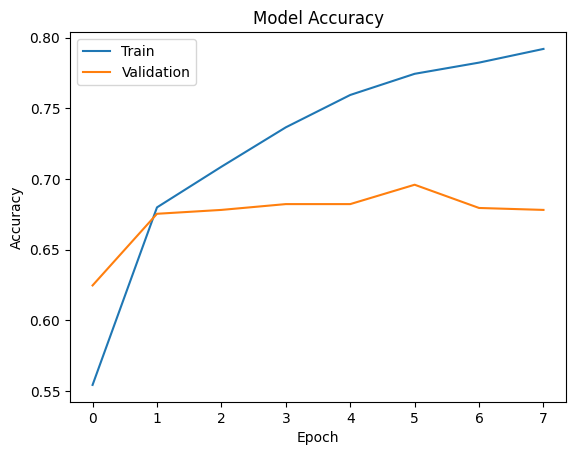

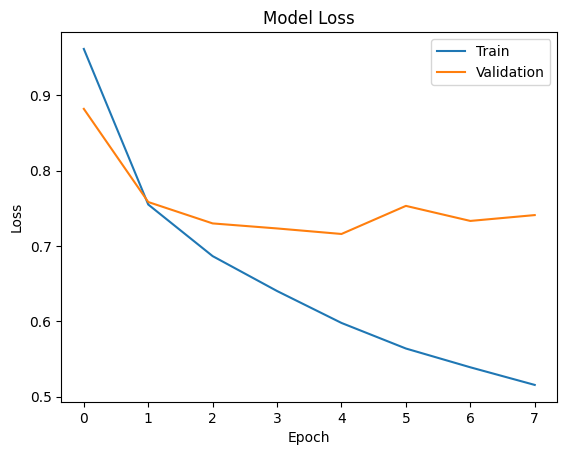

In [ ]:
# Plotting training history
import matplotlib.pyplot as plt

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Evaluate the model
predictions = np.argmax(model.predict(test_data), -1)
predictions_with_names = [label_to_name[label] for label in predictions]
print(classification_report(y_test, predictions_with_names))

23/23 [==============================] - 37s 2s/step
              precision    recall  f1-score   support

    negative       0.74      0.67      0.70       221
     neutral       0.69      0.63      0.66       273
    positive       0.73      0.88      0.80       237

    accuracy                           0.72       731
   macro avg       0.72      0.72      0.72       731
weighted avg       0.72      0.72      0.72       731

